# Pymaceuticals Inc.

## Analysis


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge( study_results,mouse_metadata,how = "inner", on =["Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Finding duplicate Mouse ID and Timepoint
Duplicates = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Extracting the duplicate rows
duplicate_rows = combined_df[Duplicates]

# Getting the unique Mouse IDs with duplicates
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

duplicate_mouse_ids 

array(['g989'], dtype=object)

In [4]:
#Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clear_df = combined_df[combined_df["Mouse ID"] != "g989" ]
clear_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
mice_numbernew = clear_df["Mouse ID"].nunique()
mice_numbernew

248

# Summary Statistics¶

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_TVmean = clear_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_TVmedian =  clear_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_TVvariance =  clear_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_TVSD =  clear_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_TVstderr=  clear_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary DataFrame.
stat_df = pd.DataFrame({
    "Mean Tumor Volume":drug_TVmean,
    "Median Tumor Volume": drug_TVmedian,
    "Tumor Volume Variance":drug_TVvariance,
    "Tumor Volume Std. Dev.":drug_TVSD,
    "Tumor Volume Std. Err.":drug_TVstderr
})

stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using the agg method to calculate the summary statistics
summary_stats = clear_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
   std='std',
    sem='sem'
)
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts¶

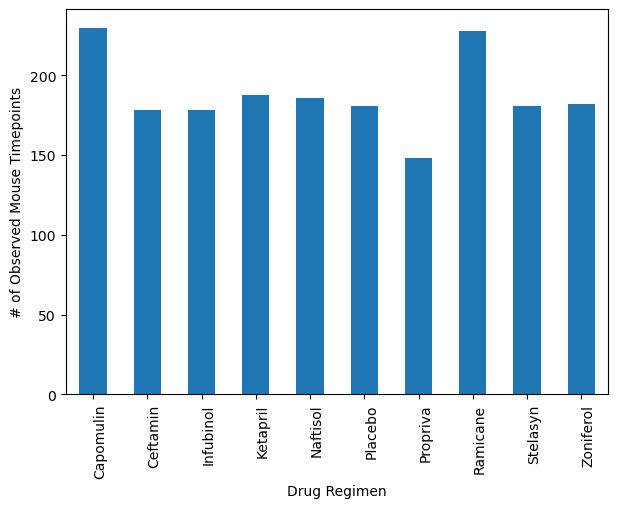

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.bar
data =clear_df.groupby("Drug Regimen")["Timepoint"].count()
data_df = data.reset_index()
data_df


bar_chart = data_df.plot(kind="bar", figsize = (7,5),legend = False,
                          xlabel = "Drug Regimen",
                          ylabel = "# of Observed Mouse Timepoints")
bar_chart.set_xticklabels(data_df["Drug Regimen"],rotation = 90, rotation_mode = "anchor",
                          ha= "right",wrap="True")
plt.show()



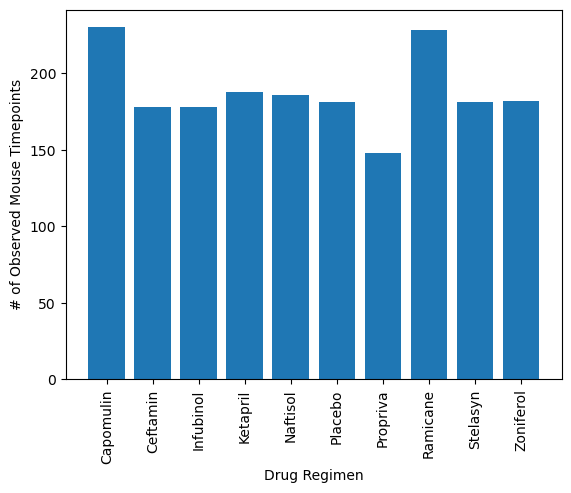

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar (data_df["Drug Regimen"],data_df["Timepoint"],align ="center")
plt.xlabel("Drug Regimen")
plt.ylabel( "# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

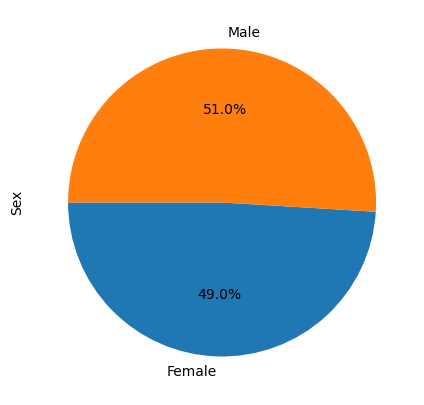

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender =clear_df.groupby("Sex").count()
gender_df = gender.reset_index()
gendernw = gender_df[["Sex", "Timepoint"]]

pie_chart = gendernw.plot(kind="pie",y = "Timepoint",autopct = '%1.1f%%', 
                          labels =("Female","Male"),
                         startangle=180, legend=False, figsize=(5,5))
plt.ylabel("Sex")
                          
plt.show()

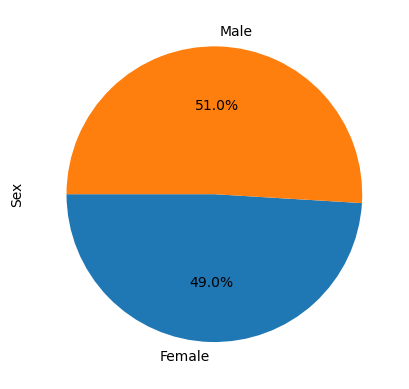

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendernw["Timepoint"],labels=("Female","Male"),
        startangle=180,autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_ofinterest = ["Capomulin" , "Ramicane" , "Infubinol" ,"Ceftamin"]
filtered_df =clear_df[clear_df["Drug Regimen"].isin(drugs_ofinterest)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_mergeddf = pd.merge(filtered_df,last_timepoints,how='right',on =['Mouse ID','Timepoint'])
new_mergeddf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin" , "Ramicane" , "Infubinol" ,"Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

 # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    treatment_data =new_mergeddf[new_mergeddf['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volume.append(treatment_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(treatments)):     
    drug = treatments[i]     
    data = tumor_volume[i]    

# Calculate the quartiles and IQR    
    quartiles = treatment_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


# Determine outliers using upper and lower bounds
    lower_bound = lowerq -(1.5* iqr)
    upper_bound = upperq +(1.5* iqr)

# Identify outliers     
    outliers = data [(data< lower_bound)|(data> upper_bound)]

    print (f"{drug}'s potential outliers : {outliers}")



  

Capomulin's potential outliers : 70    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers : 40    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)


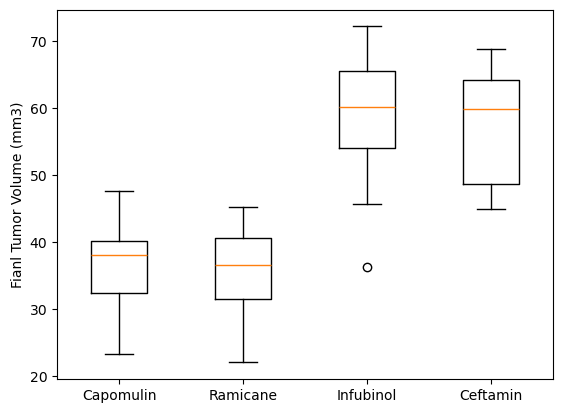

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig,ax = plt.subplots()
ax.set_ylabel('Fianl Tumor Volume (mm3)')
ax.boxplot(tumor_volume, labels=treatments)
plt.show()

# Line and Scatter Plots

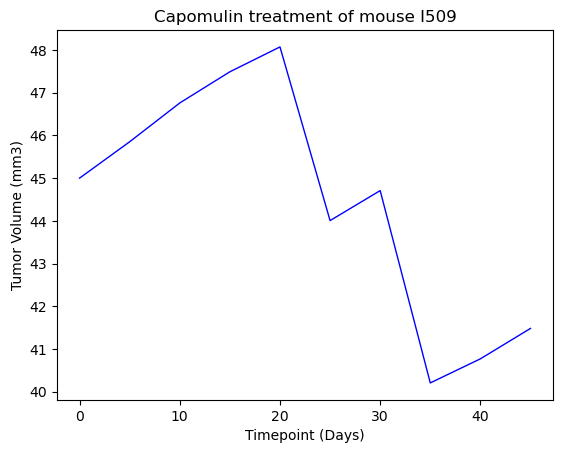

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = filtered_df.loc[filtered_df["Mouse ID"]== "l509" ]
capomulin_tumor_volumes = capomulin_data["Tumor Volume (mm3)"]
capomulin_timepoints = capomulin_data["Timepoint"]

plt.plot(capomulin_timepoints,capomulin_tumor_volumes, color = "blue",
        linewidth = 1)
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

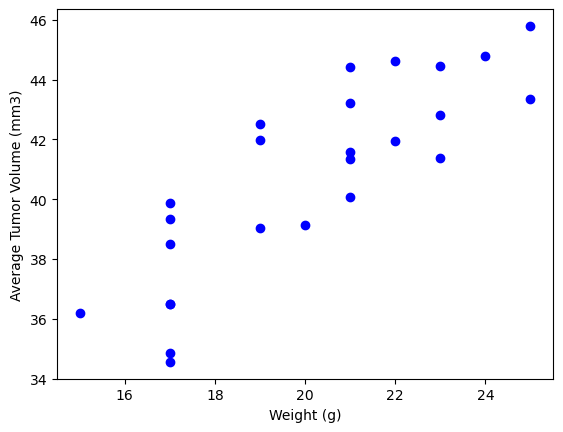

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = filtered_df.loc[filtered_df["Drug Regimen"]== "Capomulin" ]
average_tumor_volumes = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

plt.scatter(mouse_weights,average_tumor_volumes, marker = "o",facecolor = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


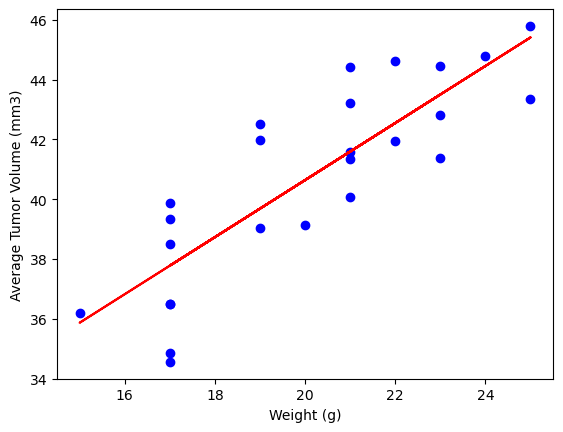

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_result = st.pearsonr (average_tumor_volumes ,mouse_weights)
correlation = correlation_result.statistic
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

#perform linear regression
from scipy import stats 
(slope,intercept,rvalue,pvalue,stderror) = stats.linregress(mouse_weights,average_tumor_volumes)
regress_values = mouse_weights* slope + intercept
line = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(mouse_weights,average_tumor_volumes, marker = "o",facecolor = "blue")
plt.plot(mouse_weights, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()